# MNIST Handwriting
MNIST stands for the Modified National Institute of Standards and Technology. The dataset used in this project contains 250 handwriting styles, split into 60,000 train and 10,000 test images. The extended MNIST dataset contains 240,000 train and 40,000 test

In [11]:
detach("package:keras", unload = TRUE)

In [12]:
install.packages("keras")

package 'keras' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alif-\AppData\Local\Temp\RtmpKiONMF\downloaded_packages


In [ ]:
install.packages("BiocManager") 
BiocManager::install("EBImage")

In [13]:
keras::install_keras()


Installation complete.



In [2]:
library(keras)
use_backend("tensorflow")

Warning message:
"package 'keras' was built under R version 3.6.3"

In [3]:
library(repr)

# Preparing the Data
Before feeding the data into our model, we first need to do some preprocessing. This includes unrolling them into a single row vector, and normalizing pixel intensity values to range between 0 and 1. The ground truth values should also be converted to one hot encoding format.

In [4]:
mnist <- dataset_mnist()

In [5]:
str(mnist)

List of 2
 $ train:List of 2
  ..$ x: int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:60000(1d)] 5 0 4 1 9 2 1 3 1 4 ...
 $ test :List of 2
  ..$ x: int [1:10000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:10000(1d)] 7 2 1 0 4 1 4 9 5 9 ...


In [6]:
# store training data
train_x <- mnist$train$x
train_y <- mnist$train$y

# store test data
test_x <- mnist$test$x
test_y <- mnist$test$y

In [7]:
table(train_y, train_y)

       train_y
train_y    0    1    2    3    4    5    6    7    8    9
      0 5923    0    0    0    0    0    0    0    0    0
      1    0 6742    0    0    0    0    0    0    0    0
      2    0    0 5958    0    0    0    0    0    0    0
      3    0    0    0 6131    0    0    0    0    0    0
      4    0    0    0    0 5842    0    0    0    0    0
      5    0    0    0    0    0 5421    0    0    0    0
      6    0    0    0    0    0    0 5918    0    0    0
      7    0    0    0    0    0    0    0 6265    0    0
      8    0    0    0    0    0    0    0    0 5851    0
      9    0    0    0    0    0    0    0    0    0 5949

In [8]:
table(test_y, test_y)

      test_y
test_y    0    1    2    3    4    5    6    7    8    9
     0  980    0    0    0    0    0    0    0    0    0
     1    0 1135    0    0    0    0    0    0    0    0
     2    0    0 1032    0    0    0    0    0    0    0
     3    0    0    0 1010    0    0    0    0    0    0
     4    0    0    0    0  982    0    0    0    0    0
     5    0    0    0    0    0  892    0    0    0    0
     6    0    0    0    0    0    0  958    0    0    0
     7    0    0    0    0    0    0    0 1028    0    0
     8    0    0    0    0    0    0    0    0  974    0
     9    0    0    0    0    0    0    0    0    0 1009

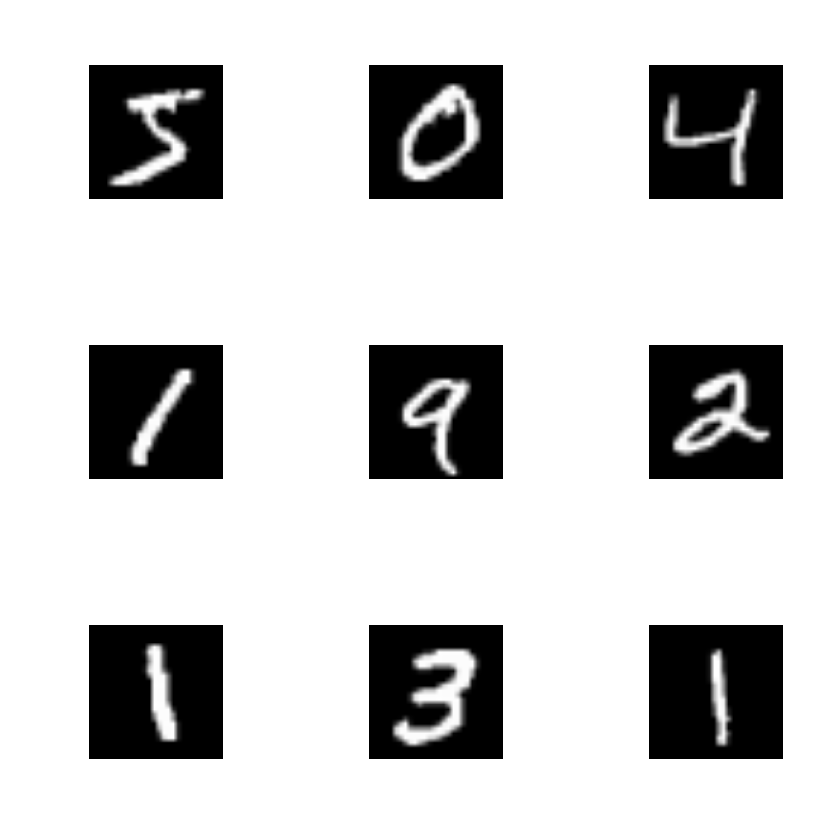

In [9]:
# Plot images
par(mfrow = c(3,3))
for (i in 1:9) plot(as.raster(train_x[i,,], max = 255))

In [10]:
orig_train_x <- train_x

In [11]:
str(train_x)

 int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...


In [12]:
# Unroll training examples from matrices to single vector
train_x <- array_reshape(train_x, c(nrow(train_x), 784))
str(train_x)

 num [1:60000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...


In [13]:
str(test_x)

 int [1:10000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...


In [14]:
# Unroll test examples from matrices to single vector
test_x <- array_reshape(test_x, c(nrow(test_x), 784))
str(test_x)

 num [1:10000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...


In [15]:
# Normalize train and test data so values range from 0 to 1
train_x <- train_x / 255
test_x <- test_x / 255

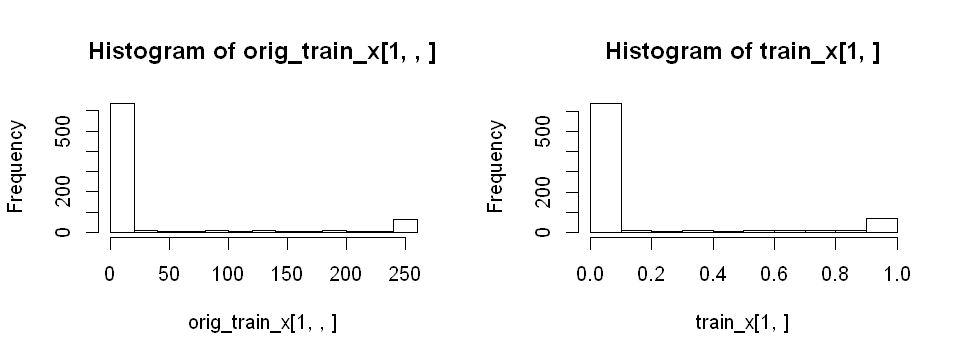

In [16]:
# View the original and normalized datasets
par(mfrow=c(1,2))
options(repr.plot.width=8, repr.plot.height=3)
hist(orig_train_x[1,,])
hist(train_x[1,])

In [17]:
# One hot encoding
train_y <- to_categorical(train_y, 10)
test_y <- to_categorical(test_y, 10)

# Some Extra Test Data
For this project, I'd also like to test the model on my own handwriting. Below is some preprocessing of my handwriting data to match the training data format.

In [18]:
# Import samples of my own handwriting
library(EBImage)
setwd("C:\\Users\\alif-\\Projects\\r-tensorflow\\mnist-handwriting\\examples")
examples = list.files(pattern = "*.jpg")

In [19]:
mypic <- list()
for (i in 1:length(examples)) {mypic[[i]] <- readImage(examples[[i]])}

In [20]:
par(mfrow=c(1,1))
str(mypic)

List of 6
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:381, 1:377, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ colormode: int 2
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:395, 1:392, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ colormode: int 2
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:408, 1:392, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ colormode: int 2
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:427, 1:405, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ colormode: int 2
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:437, 1:433, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ colormode: int 2
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:439, 1:419, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ colormode: int 2


Only the first frame of the image stack is displayed.
To display all frames use 'all = TRUE'.
Only the first frame of the image stack is displayed.
To display all frames use 'all = TRUE'.
Only the first frame of the image stack is displayed.
To display all frames use 'all = TRUE'.
Only the first frame of the image stack is displayed.
To display all frames use 'all = TRUE'.
Only the first frame of the image stack is displayed.
To display all frames use 'all = TRUE'.
Only the first frame of the image stack is displayed.
To display all frames use 'all = TRUE'.


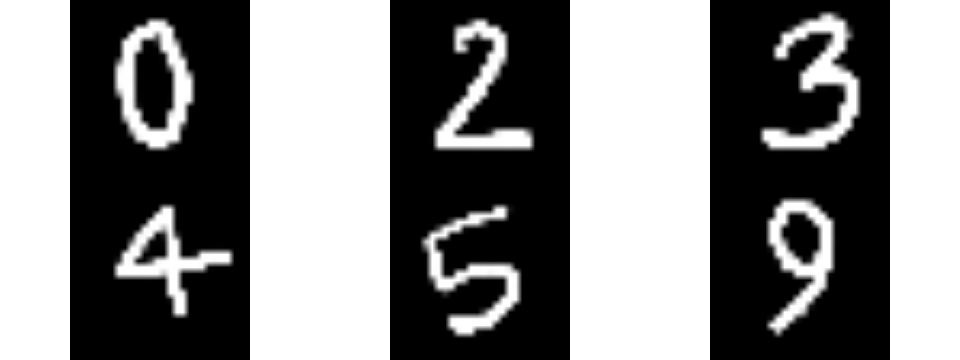

In [21]:
for (i in 1:length(examples)) {colorMode(mypic[[i]]) <- Grayscale}
for (i in 1:length(examples)) {mypic[[i]] <- 1-mypic[[i]]}
for (i in 1:length(examples)) {mypic[[i]] <- resize(mypic[[i]], 28, 28)}
par(mfrow=c(2,3))
for (i in 1:length(examples)) plot(mypic[[i]])


In [22]:
for (i in 1:length(examples)) {mypic[[i]] <- array_reshape(mypic[[i]], c(28,28,3))}
new <- NULL
for (i in 1:length(examples)) {new <- rbind(new, mypic[[i]])}
str(new)

 num [1:6, 1:2352] 0 0 0 0 0 0 0 0 0 0 ...


In [23]:
new_x <- new[,1:784]
new_y <- c(0,2,3,4,5,9)

# Creating a Model
Now that the data has been preprocessed, we can create our machine learning model. To start, we can use a simple single-layer neural network with one ReLU hidden layer and a softmax output layer.

In [24]:
# Create model
model <- keras_model_sequential()
model %>%
    layer_dense(units=128, activation="relu", input_shape=c(784)) %>%
    layer_dense(units=10, activation="softmax")
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 128)                     100480      
________________________________________________________________________________
dense_1 (Dense)                     (None, 10)                      1290        
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
________________________________________________________________________________


In [25]:
# Compile model
model %>%
    compile(loss="categorical_crossentropy",
           optimizer=optimizer_rmsprop(),
           metrics="accuracy")

In [28]:
# Fit model
history <- model %>%
    fit(train_x, train_y, epochs=50, batch_size=32, validation_split=0.2)

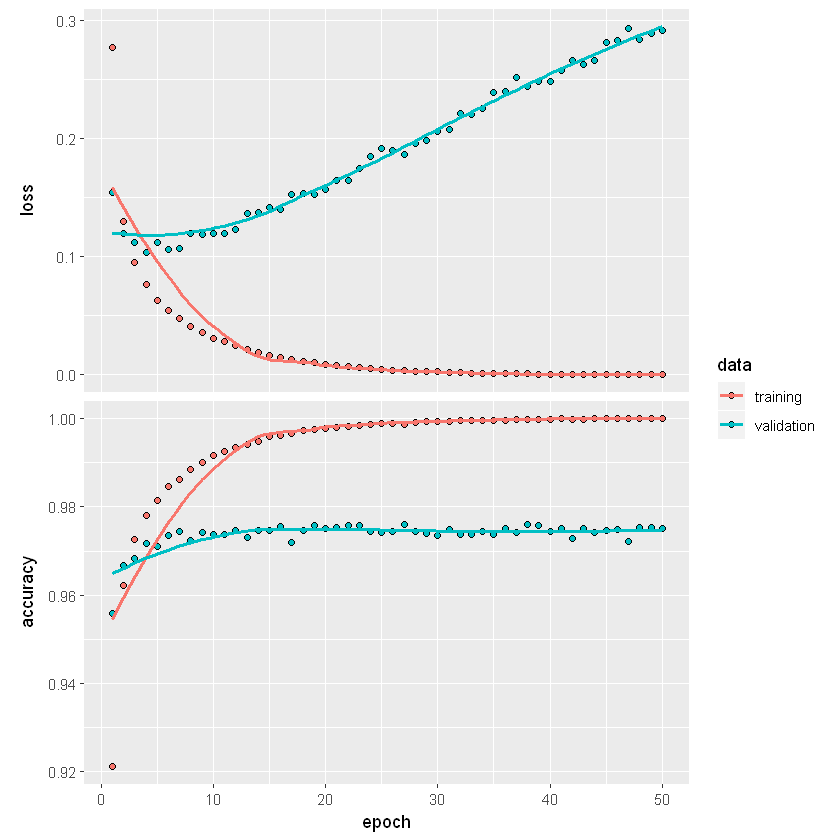

In [36]:
plot(history)

In [40]:
# Evaluation and prediction on test data
model %>% evaluate(test_x, test_y)

loss  accuracy 
0.2359719 0.9756000

In [39]:
# Create confusion matrix
pred <- model %>% predict_classes(test_x)
table(Predicted = pred, Actual = mnist$test$y)

         Actual
Predicted    0    1    2    3    4    5    6    7    8    9
        0  967    0    3    2    0    4    2    0    3    1
        1    0 1122    1    0    0    0    2    5    3    2
        2    0    4 1001    3    4    0    1    8    6    0
        3    1    1    4  987    0   10    2    5    7    5
        4    2    0    4    1  955    1    5    1    4    7
        5    1    0    0    5    0  865    6    0    6    3
        6    4    3    4    0    7    5  939    0    2    2
        7    2    2    7    2    4    1    0  999    3    3
        8    2    2    8    5    1    1    0    3  936    1
        9    1    1    0    5   11    5    1    7    4  985

In [30]:
# Predictions on my own handwriting
pred <- model %>% predict_classes(new_x)
# Confusion matrix
table(Predicted = pred, Actual = new_y)

         Actual
Predicted 0 2 3 4 5 9
        0 1 0 0 0 0 0
        2 0 1 0 0 0 1
        3 0 0 1 0 0 0
        5 0 0 0 0 1 0
        9 0 0 0 1 0 0

# Trying a Deeper Network
To further improve the network, we can make it deeper. This deeper network should be a mix of dense and dropout layers so that we avoid overfitting on the train dataset. We can also try using the Adam optimizer instead of RMSProp. 

In [76]:
# Making the network deeper
model <- keras_model_sequential()
model %>%
    layer_dense(units=512, activation="relu", input_shape=c(784)) %>%
    layer_dropout(rate=0.4) %>%
    layer_dense(units=256, activation="relu") %>%
    layer_dropout(rate=0.3) %>%
    layer_dense(units=10, activation="softmax")
summary(model)

Model: "sequential_3"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_8 (Dense)                     (None, 512)                     401920      
________________________________________________________________________________
dropout_4 (Dropout)                 (None, 512)                     0           
________________________________________________________________________________
dense_9 (Dense)                     (None, 256)                     131328      
________________________________________________________________________________
dropout_5 (Dropout)                 (None, 256)                     0           
________________________________________________________________________________
dense_10 (Dense)                    (None, 10)                      2570        
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_______________

In [77]:
# Compile model
model %>%
    compile(loss="categorical_crossentropy",
           optimizer=optimizer_adam(),
           metrics="accuracy")

In [78]:
# Fit model
history <- model %>%
    fit(train_x, train_y, epochs=30, batch_size=32, validation_split=0.2)

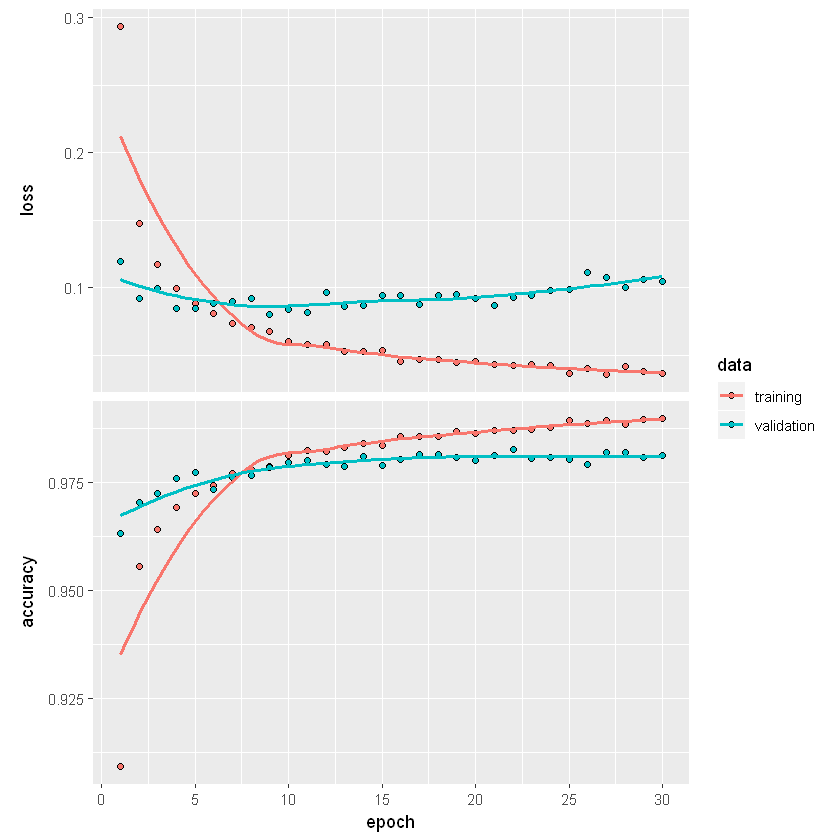

In [79]:
# Plot history
plot(history)

In [83]:
# Evaluate model
model %>% evaluate(test_x, test_y)

loss   accuracy 
0.08594599 0.98280001

In [84]:
# Confusion matrix
pred <- model %>% predict_classes(test_x)
table(Predicted = pred, Actual = mnist$test$y)

         Actual
Predicted    0    1    2    3    4    5    6    7    8    9
        0  972    0    2    0    1    2    2    0    2    1
        1    1 1124    0    0    1    0    2    5    1    3
        2    0    2 1017    1    2    0    0    5    1    0
        3    1    4    3  993    1    8    1    3    4    2
        4    0    0    1    0  956    1    2    0    0    8
        5    0    0    0    7    0  871    2    0    3    4
        6    2    3    1    0    4    7  949    0    1    1
        7    1    0    4    4    2    0    0 1007    3    6
        8    3    2    4    0    0    2    0    2  955    0
        9    0    0    0    5   15    1    0    6    4  984

In [82]:
# Predictions on my own handwriting
pred <- model %>% predict_classes(new_x)
# Confusion matrix
table(Predicted = pred, Actual = new_y)

         Actual
Predicted 0 2 3 4 5 9
        0 1 0 0 0 0 0
        2 0 1 0 0 0 0
        3 0 0 1 0 0 1
        5 0 0 0 0 1 0
        9 0 0 0 1 0 0

# Closing Thoughts
Though we were able to achieve lower loss and higher accuracy with a deeper network, ultimately the model still struggled to predict the numbers 9 and 4 accurately. This is likely because they look so similar. In the future, more training epochs may help mitigate this.